In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, nltk.tokenize as tokenize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random
from sklearn.utils import shuffle
import re
#import oxforddictionaries
import os
os.getcwd()
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [345]:
df=pd.read_csv("demonetization-tweets.csv",encoding='ISO-8859-1')
tweets=df["text"]
y=df.label
df=df.drop('label',axis=1)
tweets

0        RT @rssurjewala: Critical question: Was PayTM ...
1        RT @Hemant_80: Did you vote on #Demonetization...
2        RT @roshankar: Former FinSec, RBI Dy Governor,...
3        RT @ANI_news: Gurugram (Haryana): Post office ...
4        RT @satishacharya: Reddy Wedding! @mail_today ...
5        @DerekScissors1: Indias #demonetization: #Bla...
6        RT @gauravcsawant: Rs 40 lakh looted from a ba...
7        RT @Joydeep_911: Calling all Nationalists to j...
8        RT @sumitbhati2002: Many opposition leaders ar...
9        National reform now destroyed even the essence...
10       Many opposition leaders are with @narendramodi...
11       RT @Joydas: Question in Narendra Modi App wher...
12       @Jaggesh2 Bharat band on 28??<ed><U+00A0><U+00...
13       RT @Atheist_Krishna: The effect of #Demonetiza...
14       RT @sona2905: When I explained #Demonetization...
15       RT @Dipankar_cpiml: The Modi app on #DeMonetiz...
16       RT @roshankar: Former FinSec, RBI Dy Governor,.

In [346]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reliance\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [347]:
null=pd.isnull(tweets)

In [348]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer


cache_english_stopwords=stopwords.words('english')
punctuation += '΄´’…“”–—―»«'



In [349]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

punctuation += '΄´’…“”–—―»«' 

cache_english_stopwords = stopwords.words('english')

def tweet_clean(tweet):
    tweet_no_special_entities = re.sub(r'\&\w*;', '', tweet)
    tweet_no_tickers = re.sub(r'\$\w*', '', tweet_no_special_entities)
    tweet_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', tweet_no_tickers)
    tweet_no_hashtags = re.sub(r'#\w*', '', tweet_no_hyperlinks)
    tweet_no_punctuation = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet_no_hashtags)
    tweet_no_small_words = re.sub(r'\b\w{1,2}\b', '', tweet_no_punctuation)
    tweet_no_whitespace = re.sub(r'\s\s+', ' ', tweet_no_small_words) 
    tweet_no_whitespace = tweet_no_whitespace.lstrip(' ') 
    tweet_no_emojis = ''.join(c for c in tweet_no_whitespace if c <= '\uFFFF') 
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True) 
    tw_list = tknzr.tokenize(tweet_no_emojis)
    list_no_stopwords = [i for i in tw_list if i not in cache_english_stopwords]
    tweet_filtered =' '.join(list_no_stopwords)
    return tweet_filtered

 




In [350]:
clean_tweets=[]
for i in range(len(tweets)):
    if null.iloc[i]==True:
        pass
    else:
        clean_tweets.append(tweet_clean(tweets.iloc[i]))

In [351]:
data_clean=clean_tweets
data_clean
dat=pd.DataFrame(data_clean)


In [352]:
x_train,x_test,y_train,y_test=train_test_split(data_clean,y,test_size=0.4,random_state=53)


In [353]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(x_train)
count_test=count_vectorizer.transform(x_test)
print(count_vectorizer.vocabulary_)

{'dear': 1594, 'india': 2861, 'rich': 4687, 'narendra': 3729, 'modi': 3633, 'implement': 2812, 'demonetization': 1669, 'actually': 341, 'poor': 4187, 'congress': 1363, 'teams': 5485, 'united': 5774, 'calling': 1035, 'scam': 4850, '00a0': 28, '00bd': 50, '00b8': 46, '008f': 16, 'positive': 4203, 'development': 1736, 'better': 808, 'searches': 4875, 'app': 533, 'trending': 5664, 'stores': 5291, 'critical': 1496, 'question': 4385, 'paytm': 4050, 'informed': 2901, 'edict': 1954, 'clearly': 1234, 'fishy': 2268, 'requires': 4618, 'disclosure': 1789, 'huge': 2746, 'support': 5377, 'nation': 3736, 'people': 4066, 'voter': 5944, 'krishna': 3184, 'gandhi': 2392, 'heard': 2632, 'standing': 5234, 'months': 3654, 'govt': 2482, 'explains': 2117, 'benefits': 798, 'waiting': 5961, 'applied': 542, 'global': 2449, 'today': 5596, 'pal': 3976, 'founder': 2331, 'abhijit': 273, 'banerjee': 714, 'speaks': 5177, '4pm': 218, 'watch': 5999, 'online': 3888, 'attend': 627, 'mit': 3608, 'https': 2740, 'cut': 1539,

In [404]:
Tfd = TfidfVectorizer(stop_words="english",max_df=0.7)
Tfd_train=Tfd.fit_transform(x_train)
Tfd_test=Tfd.transform(x_test)
# Get the feature names of `tfidf_vectorizer` 
print(Tfd.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])
print(count_vectorizer)



['ysrcp', 'yup', 'zadaniambani', 'zeenewssports', 'zeeshan', 'zerch', 'zero', 'zindabad', 'zindagi', 'zone']
['000', '00716', '0080', '0081', '0082', '0083', '0084', '0086', '0087', '0088']
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [355]:
count_df=pd.DataFrame(count_train.A,columns=count_vectorizer.get_feature_names())
Tfd_df=pd.DataFrame(Tfd_train.A,columns=Tfd.get_feature_names())

In [356]:
difference=set(count_df.columns) - set(Tfd_df.columns)
print(difference)

set()


In [357]:
print(count_df.equals(Tfd_df))

False


In [358]:
def plot_confusion(cm,classes, normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype(float)/cm.sum(axis=1)[:,np.newaxis]
        print("Normalised confusion matrix")
    else:
        print("Confusion matrix, without normalisation")
    thresh=cm.max()/2.0
    print(cm)
    for i,j in range(0,2),range(0,2):
        print(cm[i,j])
        plt.text(j,i,cm[i,j], horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel("TrueLabel")
    plt.xlabel("Predicted label")

In [359]:
clf = MultinomialNB()

In [360]:
clf.fit(Tfd_train, y_train)
pred = clf.predict(Tfd_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
print(cm)

accuracy:   81.074
[[ 697  883]
 [ 248 4148]]


In [361]:
from sklearn.metrics import classification_report
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.74      0.44      0.55      1580
       False       0.82      0.94      0.88      4396

   micro avg       0.81      0.81      0.81      5976
   macro avg       0.78      0.69      0.72      5976
weighted avg       0.80      0.81      0.79      5976



Text(26.5, 0.5, 'true values')

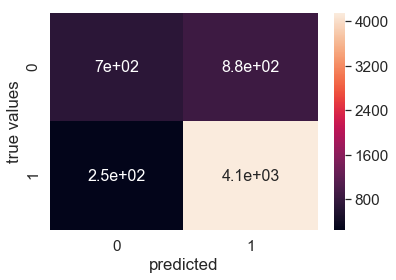

In [362]:
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   86.412
Confusion matrix, without normalisation
[[1038  542]
 [ 270 4126]]
542
542


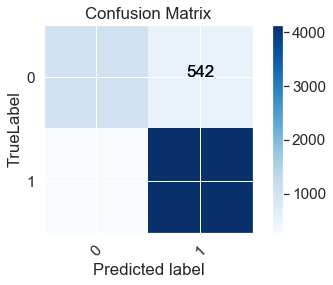

In [363]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(Tfd_train, y_train)
pred = linear_clf.predict(Tfd_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion(cm, classes=[0,1])

In [364]:
pred

array([ True,  True, False, ...,  True, False, False])

In [365]:
from sklearn.metrics import classification_report
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.79      0.66      0.72      1580
       False       0.88      0.94      0.91      4396

   micro avg       0.86      0.86      0.86      5976
   macro avg       0.84      0.80      0.81      5976
weighted avg       0.86      0.86      0.86      5976



In [366]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(Tfd_train, y_train)
    pred = nb_classifier.predict(Tfd_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.84555
Alpha: 0.10 Score: 0.84036
Alpha: 0.20 Score: 0.83835
Alpha: 0.30 Score: 0.83434
Alpha: 0.40 Score: 0.83266
Alpha: 0.50 Score: 0.82865
Alpha: 0.60 Score: 0.82564
Alpha: 0.70 Score: 0.81811
Alpha: 0.80 Score: 0.81493
Alpha: 0.90 Score: 0.81376


c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [367]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(Tfd, linear_clf, n=30)

False -8.530891340301894 pulse
False -8.357370515560907 unrest
False -7.322676581537275 action
False -6.359184581286325 requires
False -6.154762986832498 boycott
False -5.930621089394849 period
False -5.911874607293143 rises
False -5.813720261522588 suppliers
False -5.805484977676561 stolen
False -5.693396215385042 choice
False -5.6055103943675375 rally
False -5.533828029372575 retweeted
False -5.522671024289119 centerofright
False -5.399211101156128 bjp
False -5.39257795184857 implement
False -5.301778931542434 knowledg
False -5.286530013884025 spent
False -5.272833793951626 sect
False -5.254679782514272 washington
False -5.247241922947262 tweeter
False -5.168118701843593 plane
False -5.135906965430029 auctions
False -5.132420487876136 philosophy
False -5.115402820719638 rssurjewala
False -5.059743048103278 minit
False -4.968595847628645 congrats
False -4.85697640591405 app
False -4.852888603110131 fy16
False -4.8316367636840925 benefit
False -4.783532470752327 poor

True 17.211579842

In [368]:
feature_names = Tfd.get_feature_names()
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.08705885937752, 'demonetization'),
 (-4.11623123867356, 'modi'),
 (-4.21964956720984, 'india'),
 (-4.275201695849491, 'narendra'),
 (-4.331481439072828, 'rich'),
 (-4.338482364342291, 'dear'),
 (-4.342430462088563, 'implement'),
 (-4.374293486218287, 'actually'),
 (-4.822318267243844, '00a0'),
 (-4.910263204670258, '00bd'),
 (-4.923357502898273, 'bank'),
 (-4.974524139717804, '00b8'),
 (-5.079791313000572, 'terrorists'),
 (-5.081344135233498, 'lakh'),
 (-5.107622380434584, 'people'),
 (-5.144614388042907, 'kishtwar'),
 (-5.1447185320020905, 'incident'),
 (-5.146020528883493, 'looted'),
 (-5.188966911276102, 'nation'),
 (-5.317244670942649, 'support')]

In [369]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-10.176558159389662, '00716'),
 (-10.176558159389662, '0081'),
 (-10.176558159389662, '0083'),
 (-10.176558159389662, '0086'),
 (-10.176558159389662, '008b'),
 (-10.176558159389662, '008e'),
 (-10.176558159389662, '0090'),
 (-10.176558159389662, '0094'),
 (-10.176558159389662, '0097'),
 (-10.176558159389662, '0098'),
 (-10.176558159389662, '0099'),
 (-10.176558159389662, '009a'),
 (-10.176558159389662, '009b'),
 (-10.176558159389662, '009d'),
 (-10.176558159389662, '00a1'),
 (-10.176558159389662, '00a4'),
 (-10.176558159389662, '00a7'),
 (-10.176558159389662, '00ab'),
 (-10.176558159389662, '00af'),
 (-10.176558159389662, '00b6')]

In [370]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(x_train)
hash_test = hash_vectorizer.transform(x_test)
hash_test

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


<5976x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 48375 stored elements in Compressed Sparse Row format>

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   86.278
Confusion matrix, without normalisation
[[1072  508]
 [ 312 4084]]
508
508


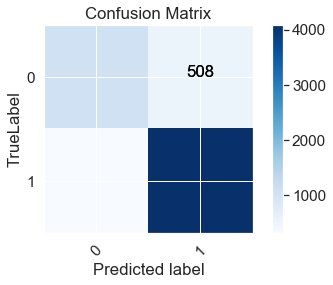

In [371]:
clf = PassiveAggressiveClassifier(n_iter=50)
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion(cm, classes=[0,1])

In [372]:
from sklearn.metrics import classification_report
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.77      0.68      0.72      1580
       False       0.89      0.93      0.91      4396

   micro avg       0.86      0.86      0.86      5976
   macro avg       0.83      0.80      0.82      5976
weighted avg       0.86      0.86      0.86      5976



In [373]:
ank=pd.read_csv('ank.csv',encoding='ISO-8859-1')
a = hash_vectorizer.transform(ank["text"])
ank

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


,text
0,vote modi survey app
1,former finsec rbi governor cbdt chair harvard ...
2,news gurugram haryana post office employees pr...
3,reddy wedding today cartoon
4,india \x92 symptom disease via
5,modi fans true nationalists country stil think...
6,team bjp cia baby cctv evm vvpat support surgi...
7,Arka will not be a demonetization
8,Ankit will not be modi
9,s.k is a fuck


In [374]:
a=pd.DataFrame({'col':y , 'text':data_clean})
a

,col,text
0,True,critical question paytm informed edict clearly...
1,True,vote modi survey app
2,True,former finsec rbi governor cbdt chair harvard ...
3,True,news gurugram haryana post office employees pr...
4,True,reddy wedding today cartoon
5,False,india  symptom disease via
6,True,lakh looted bank kishtwar third incident since...
7,True,911 calling nationalists join walk spread bene...
8,True,many opposition leaders respect decision suppo...
9,False,national reform destroyed even essence sagan i...


In [375]:
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.77      0.68      0.72      1580
       False       0.89      0.93      0.91      4396

   micro avg       0.86      0.86      0.86      5976
   macro avg       0.83      0.80      0.82      5976
weighted avg       0.86      0.86      0.86      5976



In [376]:
lr_body = LogisticRegression(penalty='l1')

# train model
lr_body.fit(hash_train, y_train)

# get predictions for article section
y_body_pred = lr_body.predict(hash_test)

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [377]:


# print metrics
print ("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_test, y_body_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, y_body_pred)*100) )


Logistig Regression F1 and Accuracy Scores : 

F1 score 79.58%
Accuracy score 84.64%


In [378]:
y

0         True
1         True
2         True
3         True
4         True
5        False
6         True
7         True
8         True
9        False
10       False
11        True
12       False
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
14910     True
14911     True
14912     True
14913     True
14914     True
14915     True
14916    False
14917     True
14918     True
14919     True
14920     True
14921     True
14922     True
14923     True
14924     True
14925    False
14926     True
14927     True
14928     True
14929     True
14930     True
14931     True
14932    False
14933    False
14934     True
14935     True
14936    False
14937     True
14938     True
14939    False
Name: label, Length: 14940, dtype: bool

In [391]:

cros_val_list = cross_val_score(lr_body, Tfd_train,y_train,cv=7)
print (cros_val_list)
print (cros_val_list.mean())

c:\users\reliance\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.82839314 0.82605304 0.828125   0.82734375 0.82734375 0.83828125
 0.815625  ]
0.8273092754067305


In [392]:
class cross_validation(object):
    '''This class provides cross validation of any data set why incrementally increasing number 
       of samples in the training and test set and performing KFold splits at every iteration. 
       During cross validation the metrics accuracy, recall, precision, and f1-score are recored. 
       The results of the cross validation are display on four learning curves. '''
    
    def __init__(self, model, X_data, Y_data, X_test=None, Y_test=None, 
                 n_splits=3, init_chunk_size = 1000000, chunk_spacings = 100000, average = "binary"):

        self.X, self.Y =  shuffle(X_data, Y_data, random_state=1234)
        
        
        self.model = model
        self.n_splits = n_splits
        self.chunk_size = init_chunk_size
        self.chunk_spacings = chunk_spacings        
        
        self.X_train = []
        self.X_test = []
        self.Y_train = []
        self.Y_test = []
        self.X_holdout = []
        self.Y_holdout = []
        
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []
        
        self.f1_mean_train = []
        self.f1_mean_test = []
        self.acc_mean_train = []
        self.acc_mean_test = []
        self.pre_mean_train = []
        self.pre_mean_test = []
        self.rec_mean_train = []
        self.rec_mean_test = []
        
        self.training_size = []
        self.averageType = average
    
    def make_chunks(self):
        '''Partitions data into chunks for incremental cross validation'''
        
        # get total number of points
        self.N_total = self.X.shape[0]
        # partition data into chunks for learning
        self.chunks = list(np.arange(self.chunk_size, self.N_total, self.chunk_spacings ))
        self.remainder = self.X.shape[0] - self.chunks[-1]
        self.chunks.append( self.chunks[-1] + self.remainder )



    def train_for_learning_curve(self):
        '''KFold cross validates model and records metric scores for learning curves. 
           Metrics scored are f1-score, precision, recall, and accuracy'''

        # partiton data into chunks 
        self.make_chunks()
        # for each iteration, allow the model to use 10 more samples in the training set 
        self.skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=1234)
        # iterate through the first n samples
        for n_points in self.chunks: 
            
        
            # split the first n samples in k folds 
            for train_index, test_index in self.skf.split(self.X[:n_points], self.Y[:n_points]):
                self.train_index, self.test_index = train_index, test_index                
                self.X_train = self.X[self.train_index]
                self.X_test = self.X[self.test_index]
                self.Y_train = self.Y[self.train_index]
                self.Y_test = self.Y[self.test_index]
                
                self.model.fit(self.X_train, self.Y_train)
                self.y_pred_train = self.model.predict(self.X_train)
                self.y_pred_test = self.model.predict(self.X_test)
                self.log_metric_scores_()   
                
            self.log_metric_score_means_()
            self.training_size.append(n_points)
        
    def validate_for_holdout_set(self, X_holdout, Y_holdout):
        
        
        self.X_test = X_holdout
        self.Y_test = Y_holdout
        
        # partiton data into chunks 
        self.make_chunks()
        
        for n_points in self.chunks:
            
            self.X_train = self.X[:n_points]
            self.Y_train = self.Y[:n_points]

            self.model.fit(self.X_train, self.Y_train)
            self.y_pred_train = self.model.predict(self.X_train)
            self.y_pred_test = self.model.predict(self.X_test)
            self.log_metric_scores_()   

            self.log_metric_score_means_()
            self.training_size.append(n_points)
            
            
    
                            
    def log_metric_score_means_(self):
        '''Recrods the mean of the four metrics recording during training'''
        self.f1_mean_train.append(np.sum(self.f1_train)/len(self.f1_train))
        self.f1_mean_test.append(np.sum(self.f1_test)/len(self.f1_test))
        
        self.acc_mean_train.append(np.sum(self.acc_train)/len(self.acc_train))
        self.acc_mean_test.append(np.sum(self.acc_test)/len(self.acc_test))
        
        self.pre_mean_train.append(np.sum(self.pre_train)/len(self.pre_train))
        self.pre_mean_test.append(np.sum(self.pre_test)/len(self.pre_test))
        
        self.rec_mean_train.append(np.sum(self.rec_train)/len(self.rec_train))
        self.rec_mean_test.append(np.sum(self.rec_test)/len(self.rec_test))
        
        self.reinitialize_metric_lists_()
            
            
    def reinitialize_metric_lists_(self):
        '''Reinitializes metrics lists for training'''
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []

            
    def log_metric_scores_(self):
        '''Records the metric scores during each training iteration'''
        self.f1_train.append(f1_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.acc_train.append(accuracy_score( self.Y_train, self.y_pred_train) )

        self.pre_train.append(precision_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.rec_train.append(recall_score( self.Y_train, self.y_pred_train, average=self.averageType) )

        self.f1_test.append(f1_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.acc_test.append(accuracy_score(self.Y_test, self.y_pred_test))

        self.pre_test.append(precision_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.rec_test.append(recall_score(self.Y_test, self.y_pred_test,average=self.averageType))
            

    def plot_learning_curve(self):
        '''Plots f1 and accuracy learning curves for a given model and data set'''
        
        fig = plt.figure(figsize = (17,12))
        # plot f1 score learning curve
        fig.add_subplot(221)   # left
        plt.title("F1-Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.f1_mean_train, label="Train")
        plt.plot(self.training_size, self.f1_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("F1-Score")
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(222)   # right 
        plt.title("Accuracy vs. Number of Training Samples")
        plt.plot(self.training_size, self.acc_mean_train, label="Train")
        plt.plot(self.training_size, self.acc_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Accuracy")
        plt.legend(loc=4);
        
        # plot precision learning curve
        fig.add_subplot(223)   # left
        plt.title("Precision Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.pre_mean_train, label="Train")
        plt.plot(self.training_size, self.pre_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Precision")
        plt.ylim(min(self.pre_mean_test), max(self.pre_mean_train) + 0.05)
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(224)   # right 
        plt.title("Recall vs. Number of Training Samples")
        plt.plot(self.training_size, self.rec_mean_train, label="Train")
        plt.plot(self.training_size, self.rec_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Recall")
        plt.legend(loc=4);

In [388]:

xtrain,xtest,ytrain,ytest = train_test_split(Tfd_train,y_train)
print (cros_val_list)
print (cros_val_list.mean())


[0.76443058 0.76443058 0.76328125 0.76484375 0.76484375 0.76484375
 0.76484375]
0.764502486349454


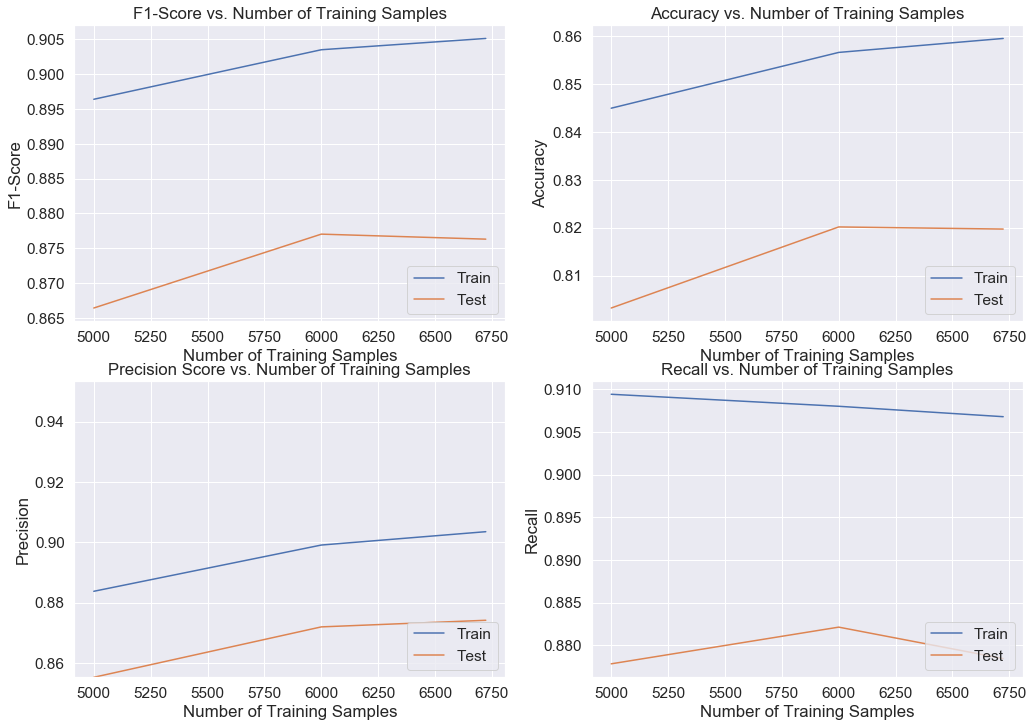

In [390]:

xtrain,xtest,ytrain,ytest = train_test_split(Tfd_train,y_train)

cv = cross_validation(lr_headline, xtrain, ytrain , n_splits=5,init_chunk_size = 5000, chunk_spacings = 1000, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

In [383]:

rcf_headline = RandomForestClassifier(n_estimators=100,n_jobs=3)

rcf_headline.fit(Tfd_train, y_train)
y_rc_headline_pred = rcf_headline.predict(Tfd_test)

In [384]:

# print metrics
print ("Random Forest F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_test, y_rc_headline_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, y_rc_headline_pred)*100) )

Random Forest F1 and Accuracy Scores : 

F1 score 86.36%
Accuracy score 89.59%


In [385]:
xgb_body = XGBClassifier()

xgb_body.fit(Tfd_train, y_train)
y_xgb_body_pred = xgb_body.predict(Tfd_test)

In [386]:
print ("XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%``".format( f1_score(y_test, y_xgb_body_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, y_xgb_body_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 60.55%``
Accuracy score 77.79%
